# *Big Mart Sales Prediction*

Dataset Link - https://www.kaggle.com/code/hiralmshah/bigmart-sales-prediction

## *Data Set Information:*

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

## *Attribute Information*

* Item_Identifier: Unique product ID
* Item_Weight: Weight of product
* Item_Fat_Content: Whether the product is low fat or not
* Item_Visibility: The % of total display area of all products in a store allocated to the particular product
* Item_Type: The category to which the product belongs
* Item_MRP: Maximum Retail Price (list price) of the product
* Outlet_Identifier: Unique store ID
* Outlet_Establishment_Year: The year in which store was established
* Outlet_Size: The size of the store in terms of ground area covered
* Outlet_Location_Type: The type of city in which the store is located
* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## *Associated Tasks: Regression*

----------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd

In [403]:
bDatatrain = pd.read_csv('bigmart_train.csv') # Loading Train Dataset
bDatatest = pd.read_csv('bigmart_test.csv') # Loading Test Dataset

In [404]:
bDatatrain.head() # Viewing first 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [405]:
bDatatest.head() # Viewing first 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [406]:
# Checking the shape of the datasets

print(f'Training data shape: {bDatatrain.shape}')
print(f'Testing data shape: {bDatatest.shape}')

Training data shape: (8523, 12)
Testing data shape: (5681, 11)


In [407]:
# 5 Number summary on Train data on numerical features

bDatatrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [408]:
bDatatrain.isnull().sum() # Checking Null Values on Training data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [409]:
bDatatest.isnull().sum() # Checking Null Values on Testing data

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [410]:
bDatatrain['source'] = 'train'
bDatatest['source'] = 'test'

bData = pd.concat([bDatatrain, bDatatest], ignore_index=True) # Concatenating train and test data

In [411]:
bData

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [412]:
bData.isnull().sum() # Checking Null Values on  data

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [413]:
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

Item_Weight


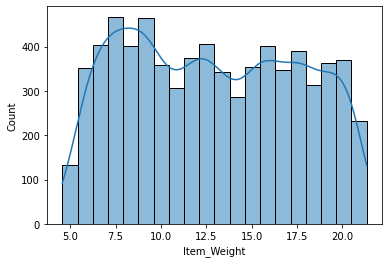

Item_Visibility


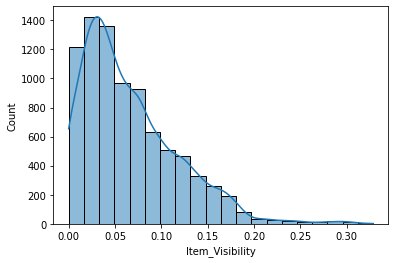

Item_MRP


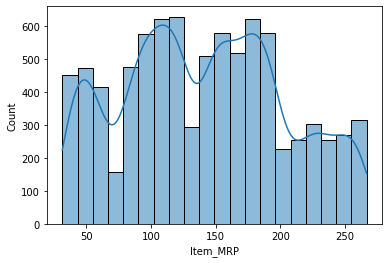

Outlet_Establishment_Year


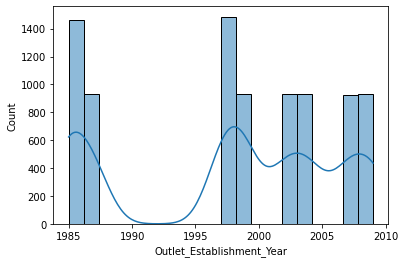

Item_Outlet_Sales


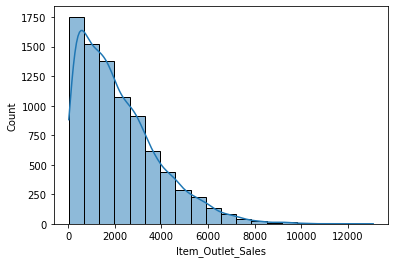

In [414]:
for i in bDatatrain.describe().columns:
    print(i)
    sns.histplot(bDatatrain[i].dropna(), kde=True, bins=20) # Visualising numeric features with Histogram
    plt.show()

Item_Weight


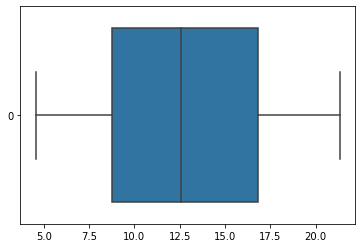

Item_Visibility


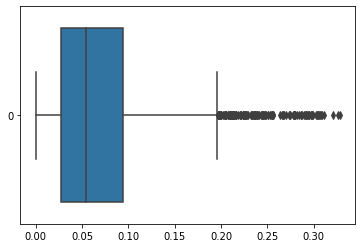

Item_MRP


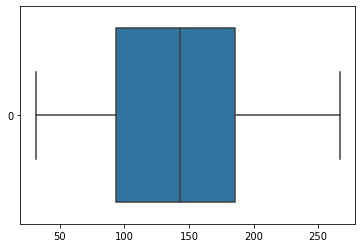

Outlet_Establishment_Year


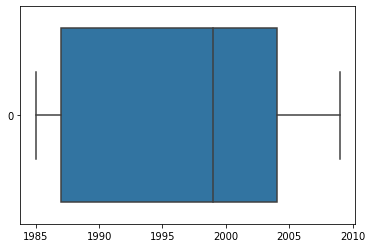

Item_Outlet_Sales


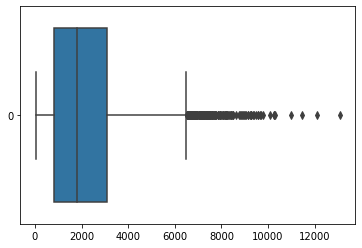

In [415]:
for i in bDatatrain.describe().columns:
    print(i)
    sns.boxplot(data = bDatatrain[i].dropna(),orient='h') # Visualising numeric features with Boxplot
    plt.show()

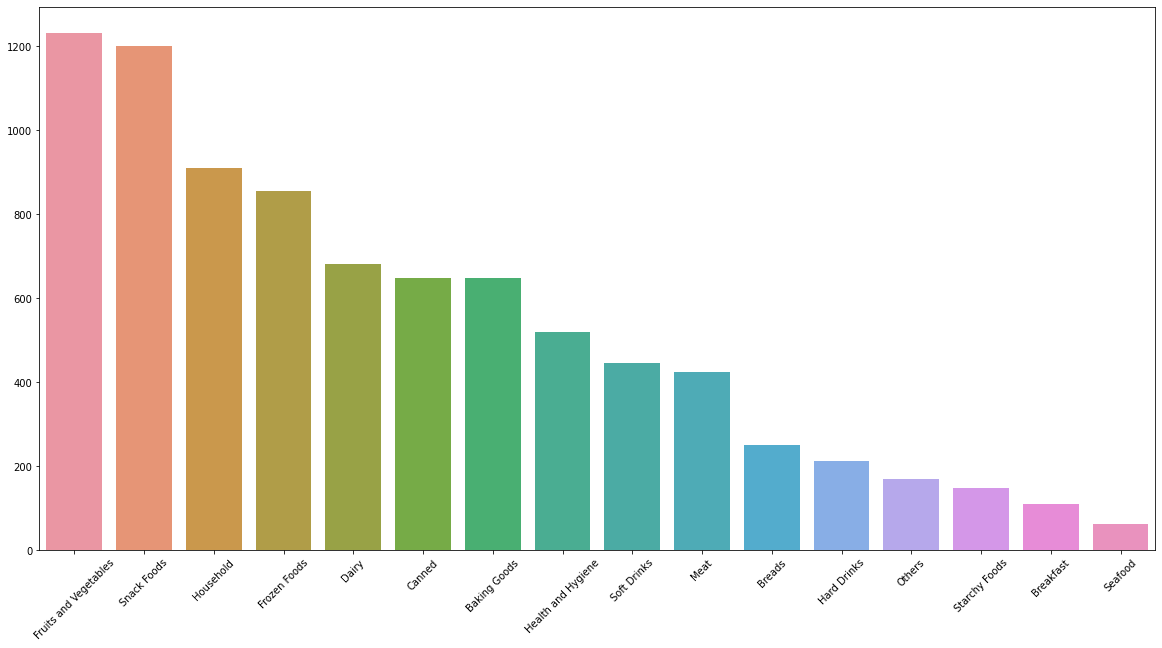

In [416]:
plt.figure(figsize=(20,10))
sns.barplot(x = bDatatrain['Item_Type'].value_counts().index,y = bDatatrain['Item_Type'].value_counts().values) 
# Visualising Item Type with Barplot
plt.xticks(rotation = 45)
plt.show()

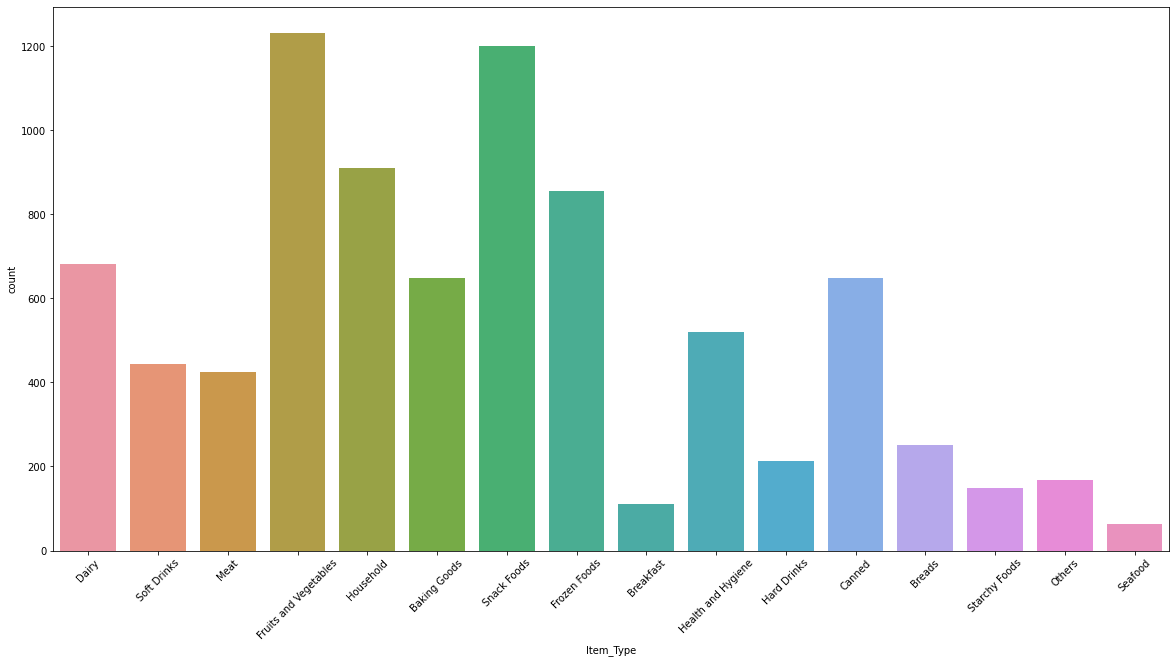

In [417]:
plt.figure(figsize=(20,10))
sns.countplot(x = bDatatrain['Item_Type']) 
# Visualising Item Type with Count plot
plt.xticks(rotation = 45)
plt.show()

In [418]:
bDatatrain['Item_Type'].value_counts().index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

In [419]:
# 'Fruits and Vegetables', 'Snack Foods' have the most count
# count plot and bar plot have similar results

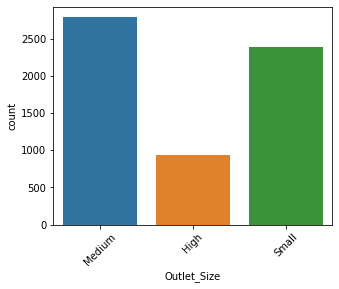

In [420]:
plt.figure(figsize=(5,4))
sns.countplot(x = bDatatrain['Outlet_Size']) 
# Visualising Outlet Size with Count plot
plt.xticks(rotation = 45)
plt.show()

In [421]:
bDatatrain['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [422]:
# Most of the outlets are medium or small

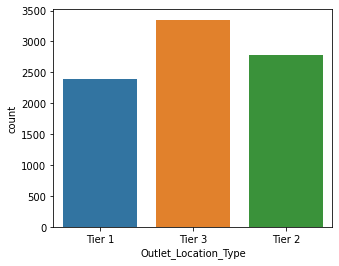

In [423]:
# Visualising Outlet Location Type with Count plot
plt.figure(figsize=(5,4))
sns.countplot(x = bDatatrain['Outlet_Location_Type']) 
plt.show()

In [424]:
bDatatrain['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [425]:
# Most of the outlets are in Tier 3 cities

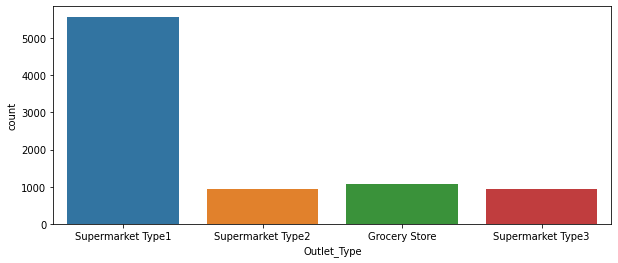

In [426]:
# Visualising Outlet Type with Count plot
plt.figure(figsize=(10,4))
sns.countplot(x = bDatatrain['Outlet_Type']) 
plt.show()

In [427]:
bDatatrain['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [428]:
# Most of the outlets are Supermarkets of type 1

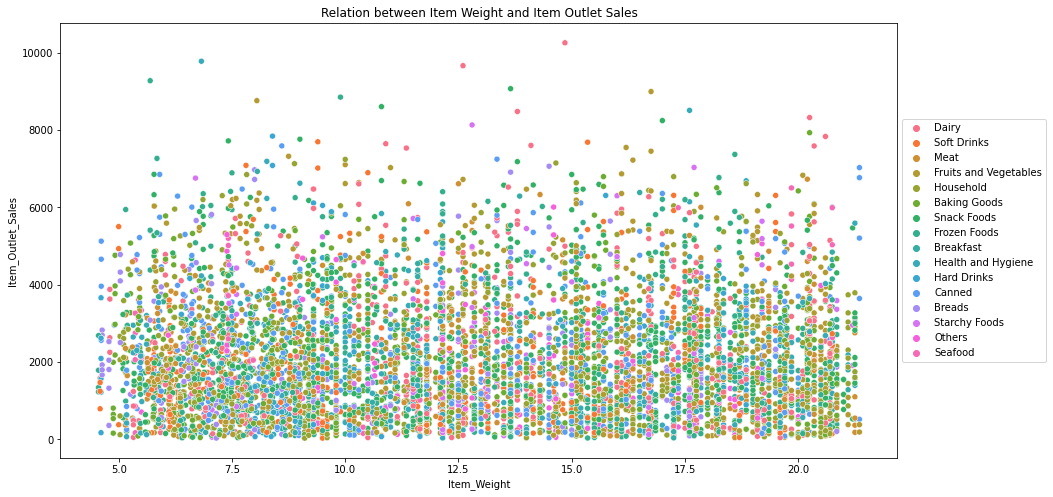

In [429]:
# Relation between Item Weight and Item Outlet Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = bDatatrain, hue = 'Item_Type')
plt.title('Relation between Item Weight and Item Outlet Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [430]:
# No correalation between Item Weight and Item Outlet Sales

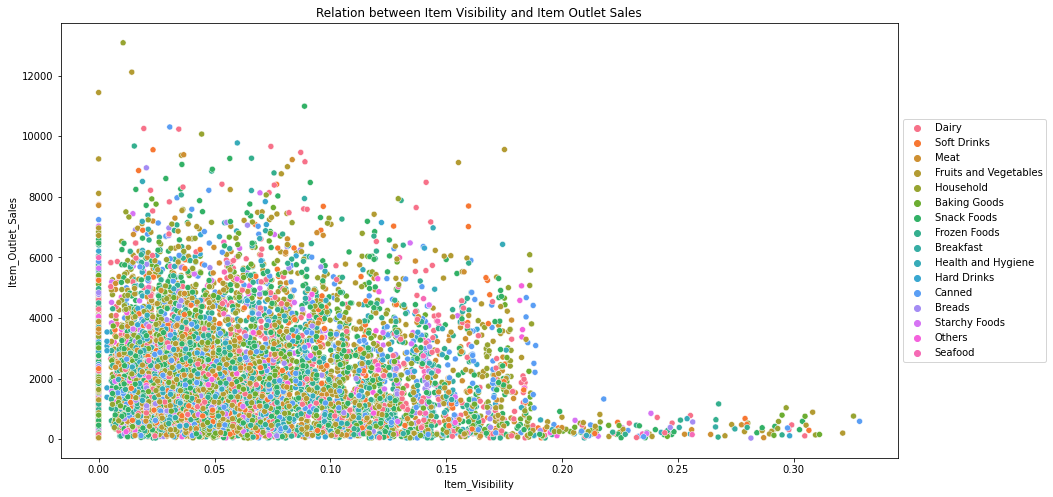

In [431]:
# Relation between Item Visibility and Item Outlet Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = bDatatrain, hue = 'Item_Type')
plt.title('Relation between Item Visibility and Item Outlet Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [432]:
# No correalation between Item Visibility and Item Outlet Sales
# Everything has low visibility
# The items that have high visibility have less sales

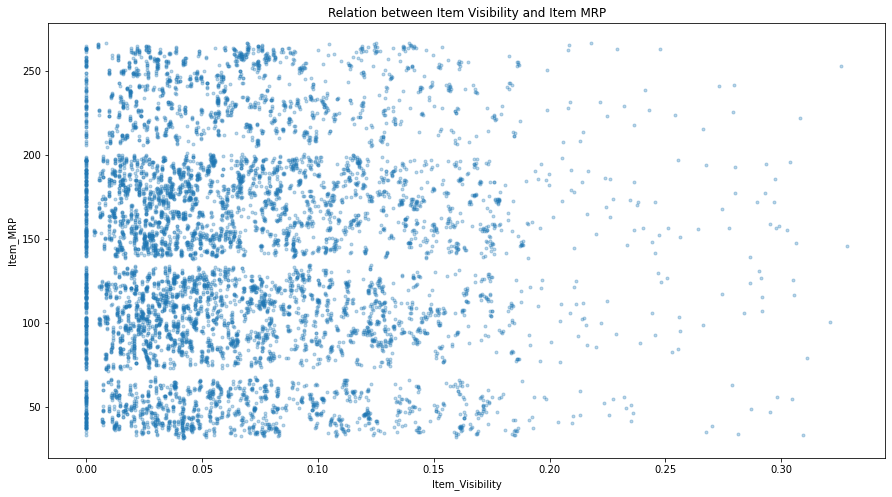

In [433]:
# Relation between Item Visibility and MRP
plt.figure(figsize=(15,8))
plt.plot(bDatatrain['Item_Visibility'],bDatatrain['Item_MRP'],'.', alpha = 0.3)
plt.title('Relation between Item Visibility and Item MRP')
plt.ylabel('Item_MRP')
plt.xlabel('Item_Visibility')
plt.show()

<IPython.core.display.Javascript object>

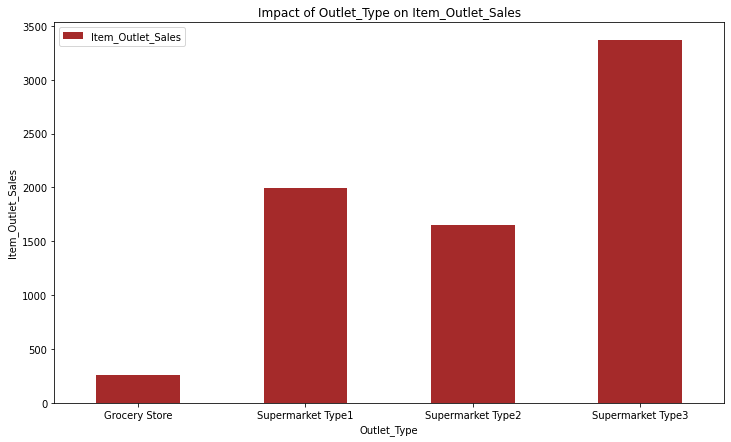

In [434]:
Item_Type_pivot = \
bDatatrain.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

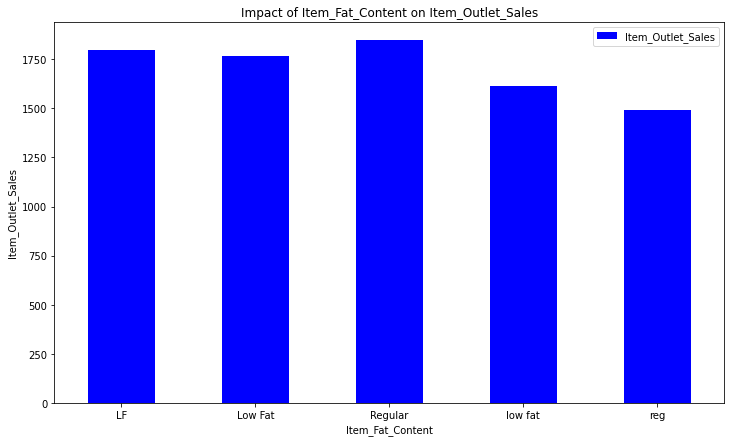

In [435]:
Item_Type_pivot = \
bDatatrain.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [436]:
bData['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [437]:
bData['Item_Fat_Content'].value_counts().index

Index(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], dtype='object')

In [438]:
bData['Item_Fat_Content'] = bData['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [439]:
bDatatrain['Item_Fat_Content'] = bDatatrain['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

<IPython.core.display.Javascript object>

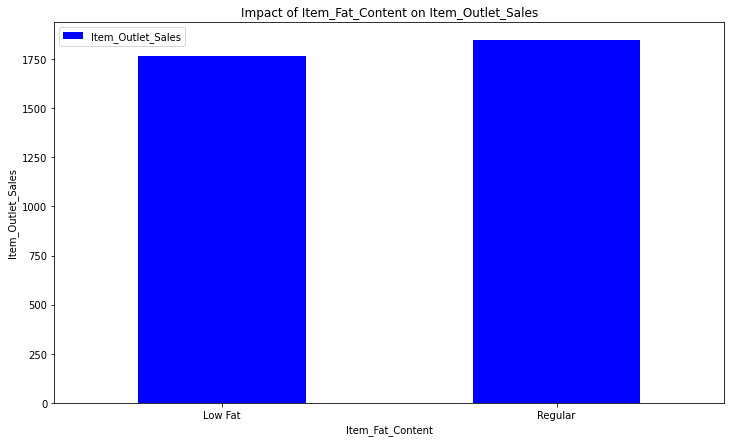

In [440]:
Item_Type_pivot = \
bDatatrain.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [441]:
bData['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_19980/3166987896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bDatatrain.corr(), annot=True) # Checking Heatmap with the numerical features


<AxesSubplot:>

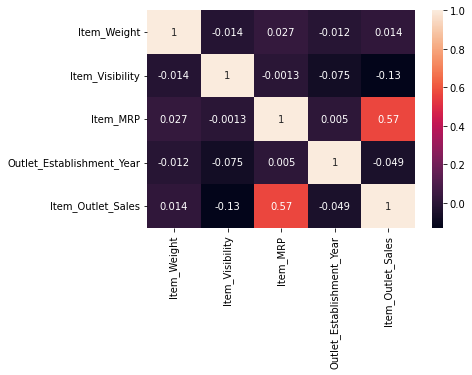

In [442]:
sns.heatmap(bDatatrain.corr(), annot=True) # Checking Heatmap with the numerical features

In [443]:
# Correalation between the numerical columns is less
# Item_Outlet_sales is correalated with Item_MRP

## *FEATURE ENGINEERING AND TRANSFORMATION*

### *Treating Missing Values*

### *Item Weight*

In [444]:
bData['Item_Weight'].isna().sum()

2439

In [445]:
bData['Item_Weight'].mean()

12.792854228644284

In [446]:
# We will replace the missing values with median since it is uniformly distributed when we took a look at the barplot earlier

bData['Item_Weight'].fillna(bData['Item_Weight'].mean(), inplace=True)

In [447]:
bData['Item_Weight'].isna().sum()

0

### *Outlet Size*

In [448]:
bData['Outlet_Size'].isna().sum()

4016

In [449]:
bData['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [450]:
bData['Outlet_Size'].fillna('Medium', inplace=True) # Since most of them are medium

In [451]:
bData['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [452]:
bData.isna().sum() # now we do not have any null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### *Item Visibility*

In [453]:
bData[bData['Item_Visibility'] == 0 ]['Item_Visibility'].count() # There are items that have no visibility
# treating the 0 value as a missing feature

879

In [454]:
bData['Item_Visibility'].fillna(bData['Item_Visibility'].median(), inplace=True) 
# Using median as the distribution was skewed when we reviewed the distribution

### *Outlet Years*

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

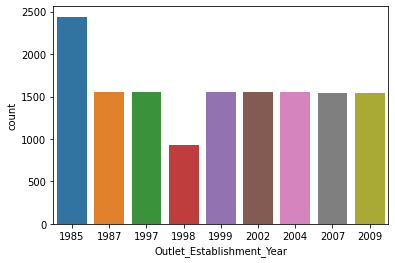

In [455]:
sns.countplot(data = bData, x = 'Outlet_Establishment_Year')

In [456]:
bData['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [457]:
bData['Outlet_Years'] = 2009 - bData['Outlet_Establishment_Year'] # Final establishment minus the previous establshed years
bData['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

### *Item Type*

In [458]:
bData['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [459]:
bData['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [460]:
bData['Item_New_Identifier'] = bData['Item_Identifier'].map(lambda x:x[:2])

In [461]:
bData['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [462]:
# most of them are non consumables, food and drinks

In [463]:
bData['Item_New_Identifier'].value_counts().index

Index(['FD', 'NC', 'DR'], dtype='object')

In [464]:
bData['New_Item_Type'] = bData['Item_New_Identifier'].map({'FD':'Food', 'NC':'Non-Consumables', 'DR':'Drinks'})

In [465]:
bData['New_Item_Type'].value_counts()

Food               10201
Non-Consumables     2686
Drinks              1317
Name: New_Item_Type, dtype: int64

In [466]:
bData[bData['New_Item_Type'] == 'Non-Consumables']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_New_Identifier,New_Item_Type
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,NC,Non-Consumables
16,NCB42,11.80,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,train,0,NC,Non-Consumables
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,train,5,NC,Non-Consumables
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,Medium,Tier 2,Supermarket Type1,838.9080,train,2,NC,Non-Consumables
31,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644,train,0,NC,Non-Consumables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14162,NCN26,10.85,Low Fat,0.028842,Household,116.9808,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,2,NC,Non-Consumables
14164,NCI43,19.85,Low Fat,0.026009,Household,49.8376,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test,10,NC,Non-Consumables
14165,NCL17,7.39,Low Fat,0.067885,Health and Hygiene,143.0812,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test,10,NC,Non-Consumables
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test,10,NC,Non-Consumables


In [467]:
# If we take a closer look at this, we could see the Non - Consumables have Low Fat
# We can change it 

In [468]:
bData[bData['New_Item_Type'] == 'Non-Consumables']['Item_Fat_Content'].value_counts()

Low Fat    2686
Name: Item_Fat_Content, dtype: int64

In [469]:
bData['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [470]:
bData.loc[bData['New_Item_Type'] == 'Non-Consumables','Item_Fat_Content'] = 'Non-Edible'

In [471]:
bData['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [472]:
item_visibility_average = bData.pivot_table(values='Item_Visibility', index = 'Item_Identifier')
item_visibility_average

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [473]:
function = lambda x: x['Item_Visibility']/item_visibility_average['Item_Visibility'][item_visibility_average.index == x['Item_Identifier']][0]
bData['item_visibility_average'] = bData.apply(function,axis=1).astype(float)

# Getting average visibility of the products with each type of Item type

In [474]:
bData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_New_Identifier,New_Item_Type,item_visibility_average
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,FD,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,DR,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,FD,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,FD,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,NC,Non-Consumables,0.000000


In [475]:
bData['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### *DEALING WITH CATEGORICAL VARIABLES*

### *Outlet Identifier*

In [476]:
bData['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [477]:
from sklearn.preprocessing import LabelEncoder # importing Label Encoder
le = LabelEncoder() # Initializing Label Encoder

bData['Outlet'] = le.fit_transform(bData['Outlet_Identifier'])

In [478]:
bData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_New_Identifier,New_Item_Type,item_visibility_average,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,FD,Food,0.931078,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,DR,Drinks,0.933420,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,FD,Food,0.960069,9
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,FD,Food,0.000000,0
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,NC,Non-Consumables,0.000000,1


In [479]:
variable = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet']
for i in variable:
    bData[i] = le.fit_transform(bData[i]) # Transforming other features together which are categorical

In [480]:
bData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_New_Identifier,New_Item_Type,item_visibility_average,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,FD,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,DR,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,FD,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,FD,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,NC,2,0.000000,1


In [481]:
# There are some features which does not use order i=within that 
# So we will go ahead with creating dummies

In [482]:
bData = pd.get_dummies(bData, columns=variable)
bData.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_New_Identifier           object
item_visibility_average      float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
O

In [483]:
bData.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


### *MODEL BUILDING*

In [484]:
# Dropping irrelavant features

bData.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [485]:
bData

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_New_Identifier,item_visibility_average,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,10,FD,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,0,DR,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,10,FD,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,train,11,FD,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,train,22,NC,0.000000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,NaN,test,12,FD,0.874729,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,NaN,test,0,FD,0.878292,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,NaN,test,7,NC,1.162245,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,214.6218,OUT017,NaN,test,2,FD,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [486]:
train = bData[bData['source'] == 'train']

In [487]:
test = bData[bData['source'] == 'test']

In [488]:
train.drop('source',axis = 1, inplace=True)

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_19980/3858884567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('source',axis = 1, inplace=True)


In [489]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_New_Identifier,item_visibility_average,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.75,0.007565,107.8622,OUT049,NaN,test,10,FD,1.029192,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.30,0.038428,87.3198,OUT017,NaN,test,2,FD,1.130311,...,0,0,1,0,0,0,0,0,0,0


In [490]:
test.drop(['source','Item_Outlet_Sales'],axis = 1, inplace=True)

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_19980/287539275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source','Item_Outlet_Sales'],axis = 1, inplace=True)


In [492]:
# Splitting into training and testing datasets

In [491]:
ytrain = train['Item_Outlet_Sales']
xtrain = train.drop(['Outlet_Identifier', 'Item_Identifier', 'Item_Outlet_Sales'], axis = 1, inplace=True)
xtest = test.drop(['Outlet_Identifier', 'Item_Identifier'], axis = 1).copy()

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_19980/1129087757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain = train.drop(['Outlet_Identifier', 'Item_Identifier', 'Item_Outlet_Sales'], axis = 1, inplace=True)


### *LINEAR REGRESSION*

In [501]:
xtrain = train.copy()

In [504]:
xtrain.drop('Item_New_Identifier',axis = 1, inplace = True)

In [505]:
from sklearn.linear_model import LinearRegression # importing Linear Regression

lir = LinearRegression(normalize=True) # Initializing Linear Regression

lir.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [508]:
xtest.drop('Item_New_Identifier',axis = 1, inplace = True)

In [510]:
lirpred = lir.predict(xtest) # Predictions

lirpred

array([1848., 1576., 1856., ..., 1756., 3564., 1244.])

In [515]:
liraccuracy = round(lir.score(xtrain, ytrain) * 100) # Accuracy
liraccuracy

56

### *DECISION TREE REGRESSOR*

In [516]:
from sklearn.tree import DecisionTreeRegressor # importing Decision Tree Regressor

dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) # Initializing Decision Tree Regressor

dtr.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [517]:
dtrpred = dtr.predict(xtest) # Predictions

dtrpred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [518]:
dtraccuracy = round(dtr.score(xtrain, ytrain) * 100) # Accuracy
dtraccuracy

62

### *RANDOM FOREST REGRESSOR*

In [519]:
from sklearn.ensemble import RandomForestRegressor # importing Random Forest Regressor

rfr = RandomForestRegressor(n_estimators=400, max_depth=6,min_samples_leaf=100,n_jobs=4) # Initializing Random Forest Regressor

rfr.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [520]:
rfrpred = rfr.predict(xtest) # Predictions

rfrpred

array([1647.31306385, 1362.82055362,  573.53065981, ..., 1928.57025441,
       3682.61363986, 1303.36238693])

In [521]:
rfraccuracy = round(rfr.score(xtrain, ytrain) * 100) # Accuracy
rfraccuracy

61

### *XG BOOST REGRESSOR*

In [522]:
from xgboost import XGBRegressor # importing XGB Regressor

xgbr = XGBRegressor(n_estimators = 100, learning_rate=0.05) # Initializing XGB Regressor

xgbr.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [523]:
xgbrpred = xgbr.predict(xtest) # Predictions

xgbrpred

array([1659.6506, 1297.625 ,  639.7941, ..., 1862.8121, 3716.712 ,
       1274.1649], dtype=float32)

In [524]:
xgbraccuracy = round(xgbr.score(xtrain, ytrain) * 100) # Accuracy
xgbraccuracy

68

## *PRINTING ALGORITHM AND ACCURACY SCORE*

In [525]:
print(f'Linear Regression : {liraccuracy}')
print(f'DECISION TREE REGRESSOR : {dtraccuracy}')
print(f'RANDOM FOREST REGRESSOR : {rfraccuracy}')
print(f'XG BOOST REGRESSOR : {xgbraccuracy}')

Linear Regression : 56
DECISION TREE REGRESSOR : 62
RANDOM FOREST REGRESSOR : 61
XG BOOST REGRESSOR : 68
